In [1]:
import numpy as np
import matplotlib.pyplot as plt

## gauss

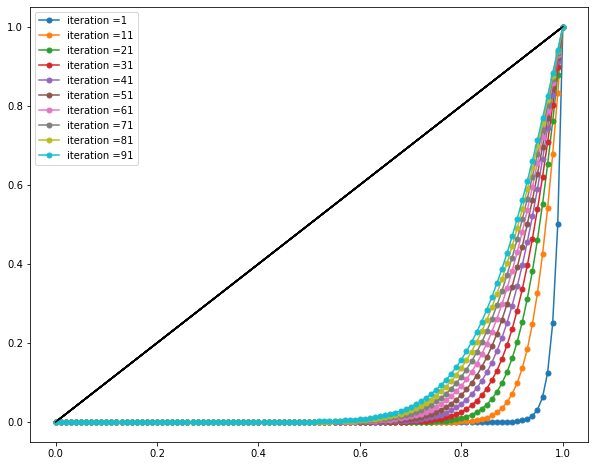

In [15]:
cut = 101
a = np.linspace(0,1,cut)
ini = 0.5*np.zeros(cut)
ini[0] = 0
ini[-1] = 1
N = 100
def f(X):
    return X
fig, ax = plt.subplots(figsize = (10,8))
for i in range(N):
    if i%10 == 1:
        ax.plot(a,ini,'o-',markersize = 5,label = 'iteration =' + str(i))
        ax.plot(a,f(a),'k-')
        
    for j in range(len(ini)-2):
        k = len(ini)-j-2
        ini[k] = (ini[k-1]+ini[k+1])/2
plt.legend()

## jacobi

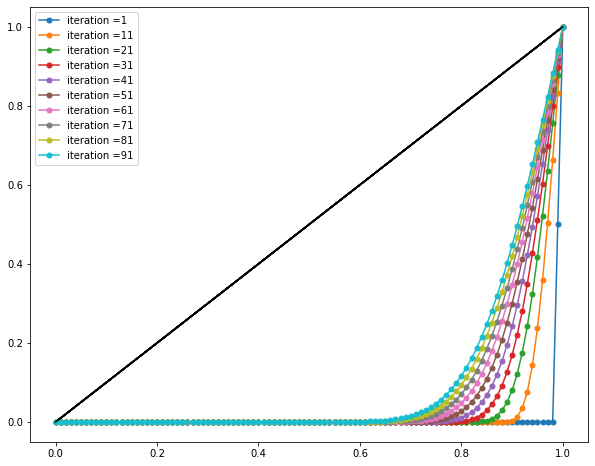

In [3]:
cut = 101
a = np.linspace(0,1,cut)
ini = np.zeros(cut)
ini[0] = 0
ini[-1] = 1
N = 100
fig, ax = plt.subplots(figsize = (10,8))
for i in range(N):
    if i%10 == 1:
        ax.plot(a,ini,'o-',markersize = 5,label = 'iteration =' + str(i))
        ax.plot(a,f(a),'k-',markersize = 5)
        
    for j in range(len(ini)-2):
        k = j+1
        ini[k] = (ini[k-1]+ini[k+1])/2
plt.legend()

## 2D--Gauss

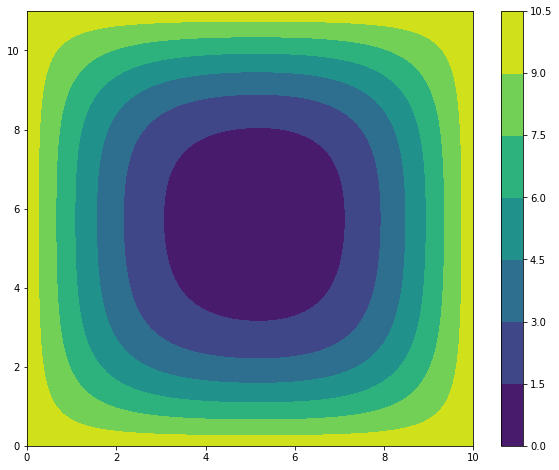

In [22]:
length = 11
width = 10
N = 100
cut = 5
x = np.linspace(0,width,width*cut+1)
y = np.linspace(0,length,length*cut+1)
X,Y = np.meshgrid(x,y,indexing = 'ij')
V = np.zeros((cut*width+1,cut*length+1))
V[0,:] = 10
V[:,0] = 10
V[width*cut,:] = 10
V[:,length*cut] = 10
fig, ax = plt.subplots(figsize = (10,8))
for n in range(N):
    for i in range(cut*width+1):
        for j in range(cut*length+1):
            if i != 0 and i != cut*width:
                if j != 0 and j != cut*length:
                    V[i][j] = (V[i-1][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4

cs = ax.contourf(X,Y,V)
fig.colorbar(cs)

## 2D -- jocobi

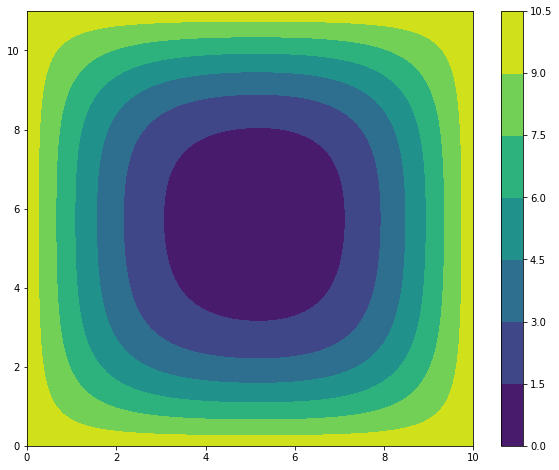

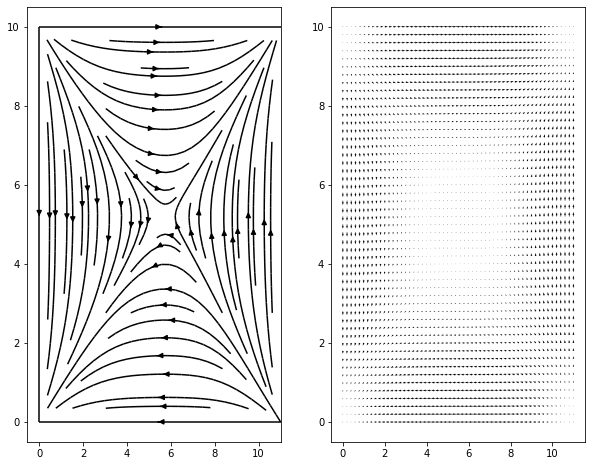

In [32]:
length = 11
width = 10
N = 100
cut = 5
x = np.linspace(0,width,width*cut+1)
y = np.linspace(0,length,length*cut+1)
X,Y = np.meshgrid(x,y,indexing = 'ij')
V = np.zeros((cut*width+1,cut*length+1))
V[0,:] = 10
V[:,0] = 10
V[width*cut,:] = 10
V[:,length*cut] = 10
tem_V = V
fig, ax = plt.subplots(figsize = (10,8))
for n in range(N):
    for i in range(cut*width+1):
        for j in range(cut*length+1):
            if i != 0 and i != cut*width:
                if j != 0 and j != cut*length:
                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4
    V = tem_V

cs = ax.contourf(X,Y,V)
fig.colorbar(cs)

Ex,Ey = np.gradient(V)
fig,ay = plt.subplots(ncols = 2,nrows = 1,figsize = (10,8))
ay[0].streamplot(Y, X, Ex, Ey, color='k')
ay[1].quiver(Y,X,Ex,Ey,color = 'k')

## change initial condition

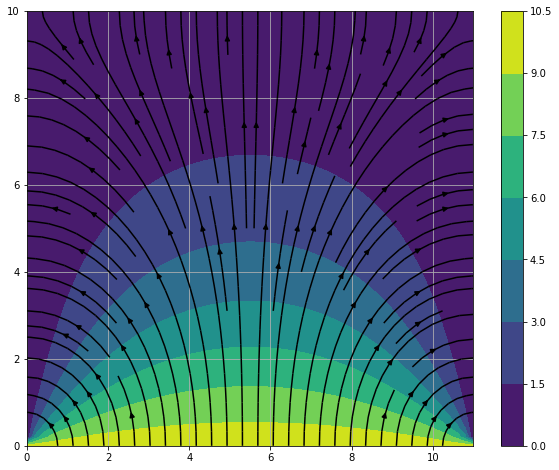

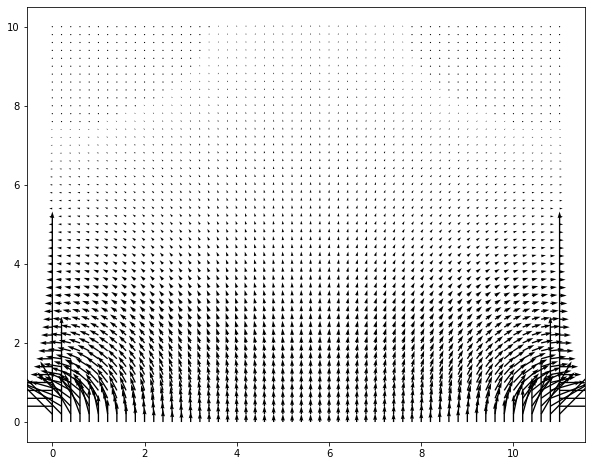

In [39]:
length = 11
width = 10
N = 1000
cut = 5
x = np.linspace(0,width,width*cut+1)
y = np.linspace(0,length,length*cut+1)
X,Y = np.meshgrid(x,y,indexing = 'ij')
V = np.zeros((cut*width+1,cut*length+1))
V[0,:] = 10
tem_V = V
fig, ax = plt.subplots(figsize = (10,8))
for n in range(N):
    for i in range(cut*width+1):
        for j in range(cut*length+1):
            if i != 0 and i != cut*width:
                if j != 0 and j != cut*length:
                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4
    V = tem_V

cs = ax.contourf(Y,X,V)
fig.colorbar(cs)

ax.grid()

Ex,Ey = np.gradient(V)
fig,ay = plt.subplots(figsize = (10,8))
ax.streamplot(Y, X, -Ey, -Ex, color='k')
ay.quiver(Y,X,-Ey,-Ex,color = 'k')

## theoretical

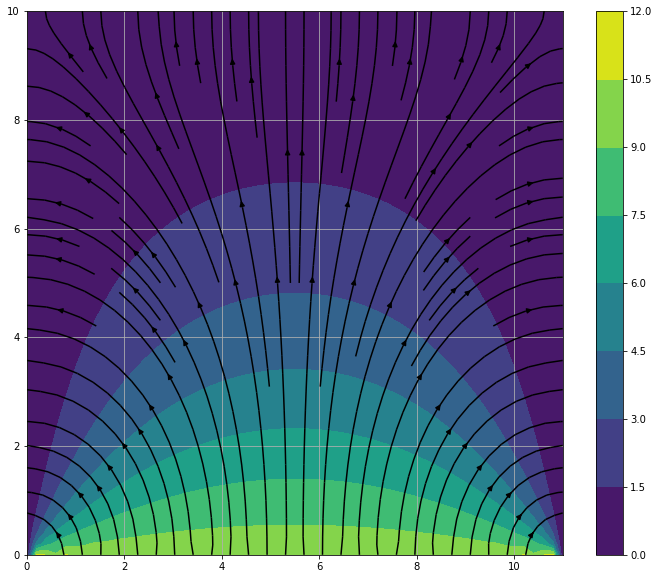

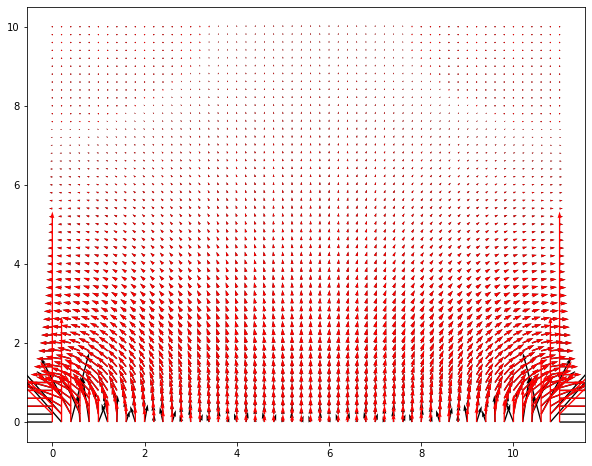

In [40]:
import numpy as np
a = 10
b = 11
u0 = 10

length = 11
width = 10
N = 100
cut = 5
x = np.linspace(0,width,width*cut+1)
y = np.linspace(0,length,length*cut+1)
X, Y = np.meshgrid(x, y,indexing='ij')
U = np.zeros_like(X)

for n in range(1,40,2):
    Bn = 4*u0/(n*np.pi*np.sinh(n*np.pi*a/b))
    U = U + Bn*np.sinh(n*np.pi*(a-X)/b)*np.sin(n*np.pi*Y/b)

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contourf(Y,X, U)
fig.colorbar(CS)

Ex1,Ey1 = np.gradient(U)
fig,ay = plt.subplots(figsize = (10,8))
ax.streamplot(Y, X, -Ey1, -Ex1, color='k')
ay.quiver(Y,X,-Ey1,-Ex1,color = 'k')
ay.quiver(Y,X,-Ey,-Ex,color = 'r')

ax.grid()

## particle

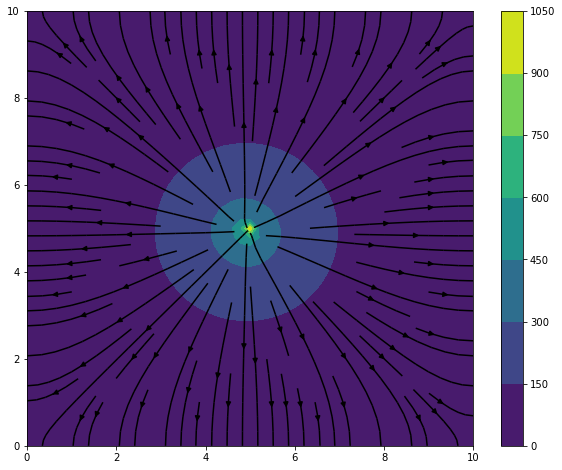

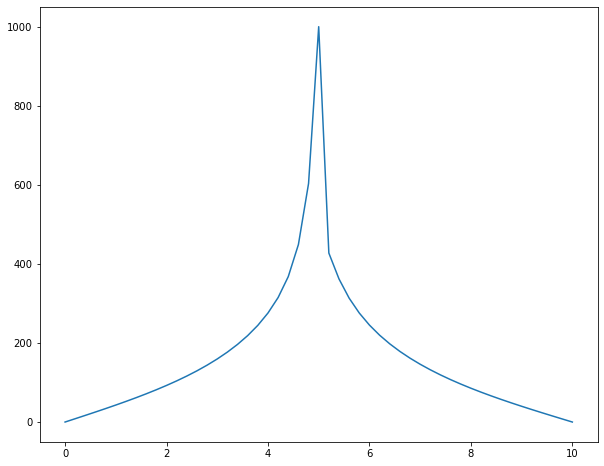

In [88]:
length = 10
width = 10
N = 10000
cut = 5
x = np.linspace(0,width,width*cut+1)
y = np.linspace(0,length,length*cut+1)
X,Y = np.meshgrid(x,y,indexing = 'ij')
V = np.zeros((cut*width+1,cut*length+1))
V[int(width*cut/2),int(length*cut/2)] = 1000
V[:,0] = 0
V[:,cut*length] = 0
V[0,:] = 0
V[cut*width,:] = 0
tem_V = V
for n in range(N):
    for i in range(cut*width+1):
        for j in range(cut*length+1):
            if i != 0 and i != cut*width:
                if j != 0 and j != cut*length:
                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4
    V = tem_V
    V[int(width*cut/2),int(length*cut/2)] = 1000
#fig, ax = plt.subplots(figsize = (10,8))
#cs = ax.contourf(X[int(width*cut*3/10):int(width*cut*7/10),int(length*cut*3/10):int(length*cut*7/10)],Y[int(width*cut*3/10):int(width*cut*7/10),int(length*cut*3/10):int(length*cut*7/10)],V[int(width*cut*3/10):int(width*cut*7/10),int(length*cut*3/10):int(length*cut*7/10)])
#cs = ax.contourf(X,Y,V)
#fig.colorbar(cs)

Ex,Ey = np.gradient(V)
fig, az = plt.subplots(figsize=(10,8))
cs1 = az.contourf(X,Y,V)
az.streamplot(Y,X, -Ey, -Ex, color='k')
fig.colorbar(cs1)


fig, ay = plt.subplots(figsize = (10,8))
ay.plot(Y[int(length*cut/2),:],V[:,int(length*cut/2)])

Text(0.5, 1.0, 'loglog')

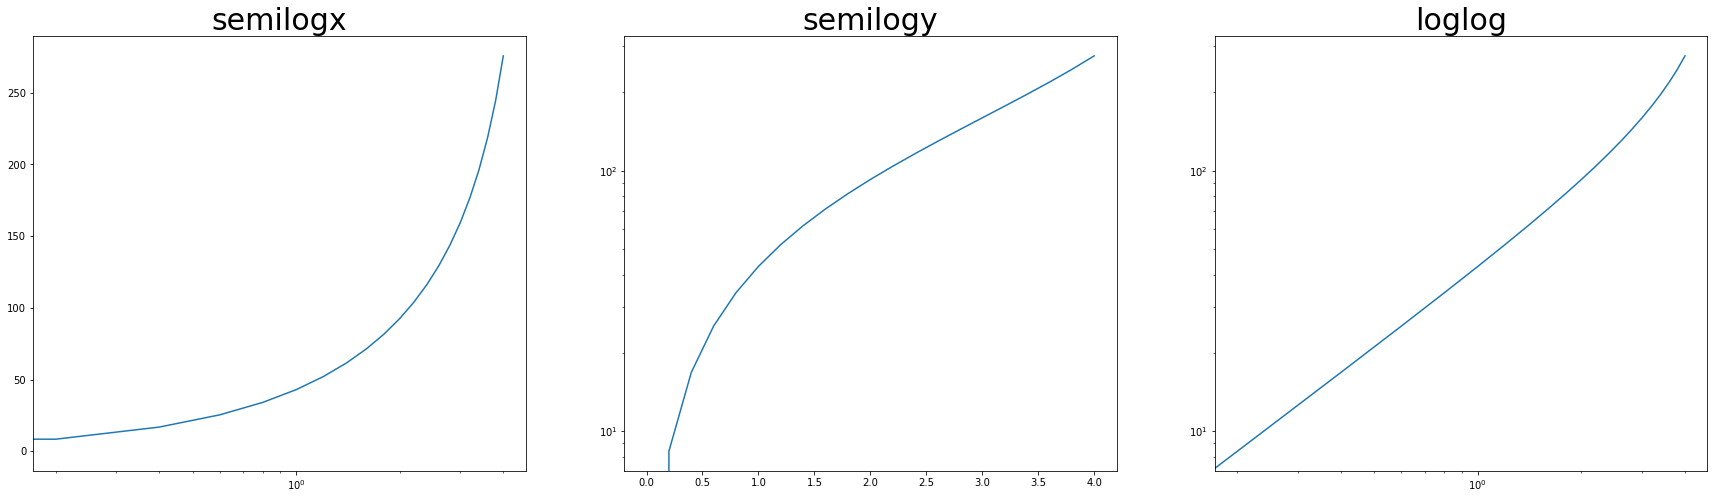

In [107]:
fig, ay = plt.subplots(ncols = 3,nrows = 1,figsize = (30,8))
ay[0].plot(Y[int(length*cut/2),:int(width*cut/2)-55],V[:int(width*cut/2)-55,int(length*cut/2)])
ay[0].semilogx()
ay[0].set_title('semilogx',size = '30')
ay[1].plot(Y[int(length*cut/2),:int(width*cut/2)-55],V[:int(width*cut/2)-55,int(length*cut/2)])
ay[1].semilogy()
ay[1].set_title('semilogy',size = '30')
ay[2].plot(Y[int(length*cut/2),:int(width*cut/2)-55],V[:int(width*cut/2)-55,int(length*cut/2)])
ay[2].loglog()
ay[2].set_title('loglog',size = '30')



## dipole

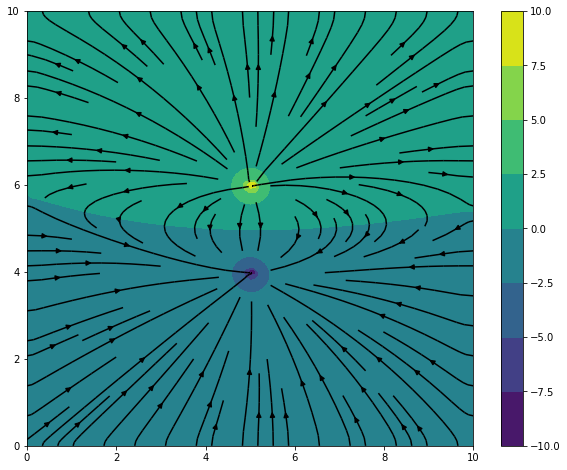

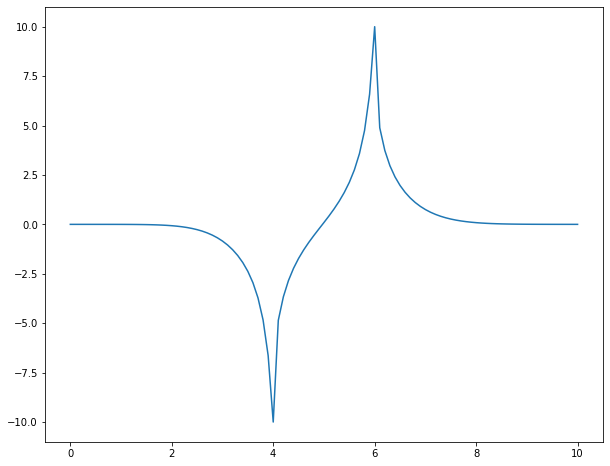

In [8]:
length = 10
width = 10
N = 100
cut = 10
x = np.linspace(0,width,width*cut+1)
y = np.linspace(0,length,length*cut+1)
X,Y = np.meshgrid(x,y,indexing = 'ij')
V = np.zeros((cut*width+1,cut*length+1))

V[int(width*cut*60/100),int(length*cut/2):int(length*cut/2)+2] = 10
V[int(width*cut*40/100),int(length*cut/2):int(length*cut/2)+2] = -10
#V[int(width*cut*6/10),int(length*cut/2)] = 10
#V[int(width*cut*4/10),int(length*cut/2)] = -10

tem_V = V
fig, ax = plt.subplots(figsize = (10,8))
for n in range(N):
    for i in range(cut*width+1):
        for j in range(cut*length+1):
            if i != 0 and i != cut*width:
                if j != 0 and j != cut*length:
                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4
    V = tem_V
    V[int(width*cut*60/100),int(length*cut/2):int(length*cut/2)+2] = 10
    V[int(width*cut*40/100),int(length*cut/2):int(length*cut/2)+2] = -10

#cs = ax.contourf(X[int(cut*width*3/10):int(cut*width*7/10),int(cut*length*3/10):int(cut*length*7/10)],Y[int(cut*width*3/10):int(cut*width*7/10),int(cut*length*3/10):int(cut*length*7/10)],V[int(cut*width*3/10):int(cut*width*7/10),int(cut*length*3/10):int(cut*length*7/10)])
cs = ax.contourf(Y,X,V)
fig.colorbar(cs)
Ex,Ey = np.gradient(V)
ax.streamplot(Y,X, -Ey, -Ex, color='k')

#fig,az = plt.subplots(figsize = (10,8))
#cs1 = az.contourf(X[int(cut*width*3/10):int(cut*width*7/10),int(cut*length*3/10):int(cut*length*7/10)],Y[int(cut*width*3/10):int(cut*width*7/10),int(cut*length*3/10):int(cut*length*7/10)],V[int(cut*width*3/10):int(cut*width*7/10),int(cut*length*3/10):int(cut*length*7/10)])
#fig.colorbar(cs1)

fig, ay = plt.subplots(figsize = (10,8))
ay.plot(Y[int(length*cut/2),:],V[:,int(length*cut/2)])

## parallel plane

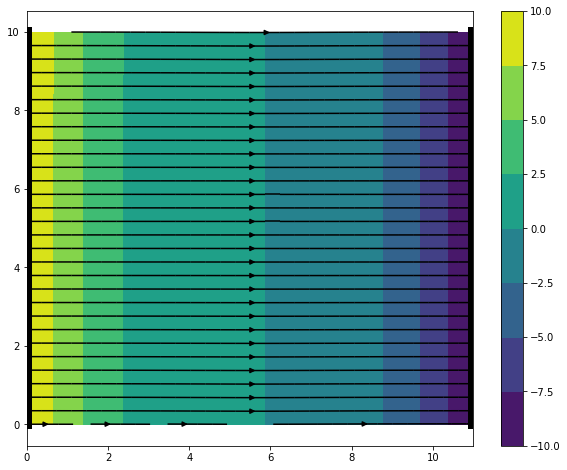

In [16]:
length = 11
width = 10
N = 100
cut = 5
x = np.linspace(0,width,width*cut+1)
y = np.linspace(0,length,length*cut+1)
X,Y = np.meshgrid(x,y,indexing = 'ij')
V = np.zeros((cut*width+1,cut*length+1))
V[:,0] = 10
V[:,length*cut] = -10
tem_V = V
fig, ax = plt.subplots(figsize = (10,8))
for n in range(N):
    for i in range(cut*width+1):
        for j in range(cut*length+1):
            if i != 0 and i != cut*width:
                if j != 0 and j != cut*length:
                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4
            if i == 0:
                if j != 0 and j != cut*length:
                    tem_V[i][j] = (V[cut*width][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4
            if i == cut*width:
                if j != 0 and j != cut*length:
                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[0][j]+V[i][j+1])/4
            
    V = tem_V

cs = ax.contourf(Y,X,V)
fig.colorbar(cs)
Ex,Ey = np.gradient(V)
ax.streamplot(Y,X, -Ey, -Ex, color='k')
t = np.linspace(0,10)
ax.plot(t*0,t,'k',linewidth = '10')
ax.plot(t*0+11,t,'k',linewidth = '10')

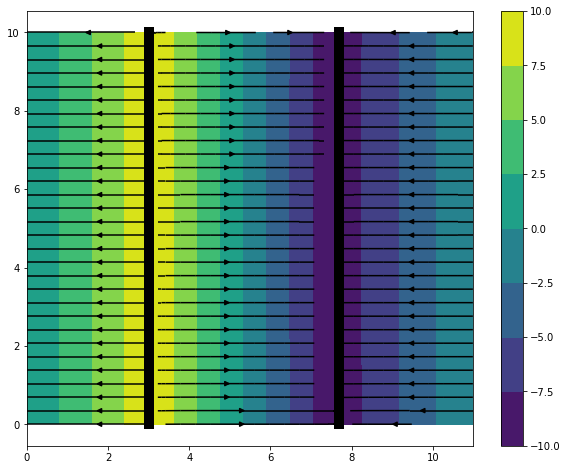

In [14]:
length = 11
width = 10
N = 1000
cut = 5
x = np.linspace(0,width,width*cut+1)
y = np.linspace(0,length,length*cut+1)
X,Y = np.meshgrid(x,y,indexing = 'ij')
V = np.zeros((cut*width+1,cut*length+1))
V[:,int(length*cut*3/10)] = 10
V[:,int(length*cut*7/10)] = -10
tem_V = V
fig, ax = plt.subplots(figsize = (10,8))
for n in range(N):
    for i in range(cut*width+1):
        for j in range(cut*length+1):
            if i != 0 and i != cut*width:
                if j != 0 and j != cut*length:
                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4
            if i == 0:
                if j != 0 and j != cut*length:
                    tem_V[i][j] = (V[cut*width][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4
            if i == cut*width:
                if j != 0 and j != cut*length:
                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[0][j]+V[i][j+1])/4                    
#            if i != 0 and i != cut*width:
#                if j ==0:
#                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4
#                if j ==cut*length:
#                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[i+1][j]+V[i][0])/4
            
    V = tem_V
    V[:,int(length*cut*3/10)] = 10
    V[:,int(length*cut*7/10)] = -10
    V[:,0] = 0
    V[:,length*cut] = 0

cs = ax.contourf(Y,X,V)
fig.colorbar(cs)
Ex,Ey = np.gradient(V)
ax.streamplot(Y,X, -Ey, -Ex, color='k')
t = np.linspace(0,10)
ax.plot(t*0+3,t,'k',linewidth = '10')
ax.plot(t*0+11*7/10,t,'k',linewidth = '10')

## finite parallel plane

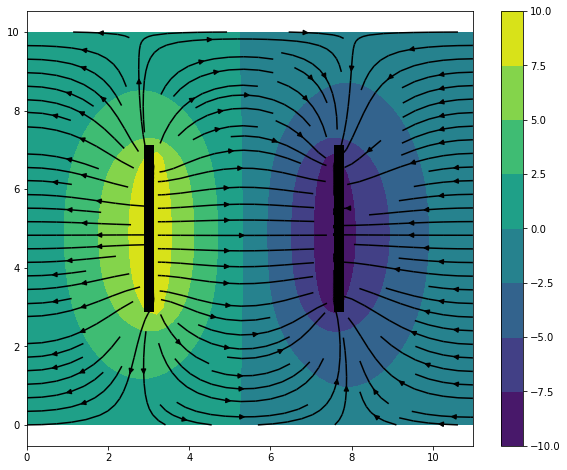

In [15]:
length = 11
width = 10
N = 1000
cut = 5
x = np.linspace(0,width,width*cut+1)
y = np.linspace(0,length,length*cut+1)
X,Y = np.meshgrid(x,y,indexing = 'ij')
V = np.zeros((cut*width+1,cut*length+1))
V[int(width*cut*3/10):int(width*cut*7/10),int(length*cut*3/10)] = 10
V[int(width*cut*3/10):int(width*cut*7/10),int(length*cut*7/10)] = -10
tem_V = V
fig, ax = plt.subplots(figsize = (10,8))
for n in range(N):
    for i in range(cut*width+1):
        for j in range(cut*length+1):
            if i != 0 and i != cut*width:
                if j != 0 and j != cut*length:
                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4
            if i == 0:
                if j != 0 and j != cut*length:
                    tem_V[i][j] = (V[cut*width][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4
            if i == cut*width:
                if j != 0 and j != cut*length:
                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[0][j]+V[i][j+1])/4                    
#            if i != 0 and i != cut*width:
#                if j ==0:
#                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4
#                if j ==cut*length:
#                    tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[i+1][j]+V[i][0])/4
            
    V = tem_V
    V[int(width*cut*3/10):int(width*cut*7/10),int(length*cut*3/10)] = 10
    V[int(width*cut*3/10):int(width*cut*7/10),int(length*cut*7/10)] = -10
    V[:,0] = 0
    V[:,length*cut] = 0

cs = ax.contourf(Y,X,V)
fig.colorbar(cs)
Ex,Ey = np.gradient(V)
ax.streamplot(Y,X, -Ey, -Ex, color='k')
t = np.linspace(3,7)
ax.plot(t*0+3,t,'k',linewidth = '10')
ax.plot(t*0+11*7/10,t,'k',linewidth = '10')

## running test

In [112]:
def relax(cut1,cut2):
    N = 10
    length = 10
    width = 10
    x = np.linspace(0,width,width*cut1+1)
    y = np.linspace(0,length,length*cut2+1)
    X,Y = np.meshgrid(x,y,indexing = 'ij')
    V = np.zeros((cut1*width+1,cut2*length+1))
    V[0,:] = 10
    V[:,0] = 10
    V[width*cut1,:] = 10
    V[:,length*cut2] = 10
    tem_V = V
    for n in range(N):
        for i in range(cut1*width+1):
            for j in range(cut2*length+1):
                if i != 0 and i != cut1*width:
                    if j != 0 and j != cut2*length:
                        tem_V[i][j] = (V[i-1][j]+V[i][j-1]+V[i+1][j]+V[i][j+1])/4
        V = tem_V

In [131]:
%timeit relax(10,1)

21 ms ± 856 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [132]:
%timeit relax(10,2)

44.4 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [133]:
%timeit relax(10,3)

67 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [134]:
%timeit relax(10,4)

88.5 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [135]:
%timeit relax(10,5)

114 ms ± 2.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [136]:
%timeit relax(10,6)

134 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [137]:
%timeit relax(10,7)

156 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [138]:
%timeit relax(10,8)

181 ms ± 5.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [139]:
%timeit relax(10,9)

211 ms ± 8.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [140]:
%timeit relax(10,10)

225 ms ± 7.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [141]:
%timeit relax(10,11)

239 ms ± 7.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [142]:
%timeit relax(10,12)

262 ms ± 7.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [143]:
%timeit relax(10,13)

291 ms ± 5.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [144]:
%timeit relax(10,14)

329 ms ± 19.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [145]:
%timeit relax(10,15)

363 ms ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [146]:
%timeit relax(10,16)

364 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [147]:
%timeit relax(10,17)

384 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [148]:
%timeit relax(10,18)

414 ms ± 21.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [149]:
%timeit relax(10,19)

420 ms ± 15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [150]:
%timeit relax(10,20)

445 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[]

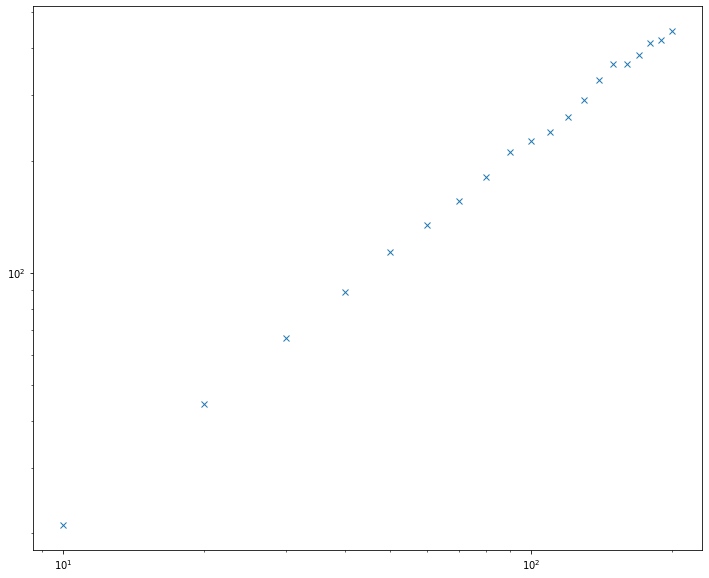

In [151]:
NL = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
T = [21,44.4,67,88.5,114,134,156,181,211,225,239,262,291,329,363,364,384,414,420,445]
fig,ax = plt.subplots(figsize = (12,10))
ax.plot(NL,T,'x')
ax.loglog()